<a href="https://colab.research.google.com/github/faizaungguh/projek-pba-analisisbert/blob/main/Analisis_BERT_Tweet_dari_X.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analisis BERT dengan bahasa Indonesia

## Pengertian BERT

IndoBERT adalah model bahasa yang diadaptasi khusus untuk bahasa Indonesia. Ini merupakan versi dari BERT (Bidirectional Encoder Representations from Transformers) yang telah dilatih untuk memahami teks dalam bahasa Indonesia. Model ini sangat berguna dalam tugas analitik teks seperti pemahaman teks, pengklasifikasian sentimen, dan pemodelan bahasa, karena dapat menghasilkan representasi vektor teks yang kaya dan kontekstual.

BERT adalah sebuah model bahasa yang revolusioner dalam pemrosesan bahasa alami (NLP). Model ini dikembangkan oleh Google AI pada tahun 2018. Berikut adalah beberapa poin kunci tentang BERT:

- Model Bahasa: BERT adalah model bahasa yang mendalam berbasis transformer. Ini memiliki kemampuan untuk memahami konteks dan hubungan antara kata dalam teks dengan cara yang lebih baik daripada model sebelumnya.

- Bidireksional: BERT memproses teks secara simultan dari kedua arah (disebut "bidireksional"), yang berarti ia dapat memahami kata-kata dalam konteks lengkap mereka dalam kalimat, bukan hanya dari kiri ke kanan atau sebaliknya. Ini memberikan pemahaman yang lebih baik tentang arti sebenarnya dari kata-kata dalam suatu konteks.

- Pre-trained dan Fine-tuning: BERT dilatih terlebih dahulu pada korpus teks yang sangat besar, sehingga modelnya memahami banyak aspek bahasa. Kemudian, model BERT ini dapat di-tune ulang untuk tugas-tugas NLP tertentu, seperti pengklasifikasian teks, pemahaman teks, atau tugas-tugas terkait bahasa lainnya.

- State-of-the-Art: Ketika BERT pertama kali diperkenalkan, itu mencapai hasil yang sangat baik dalam berbagai tugas pemrosesan bahasa alami dan sejak itu menjadi dasar bagi banyak perkembangan terbaru dalam NLP. Model-model berbasis BERT telah menjadi standar de facto untuk tugas-tugas NLP.

- Open Source: Google merilis BERT sebagai perangkat sumber terbuka sehingga peneliti dan pengembang di seluruh dunia dapat menggunakannya dan melakukan fine-tuning sesuai dengan kebutuhan mereka.


## Referensi : https://www.kaggle.com/code/rizkia14/analisis-sentimen-unsupervised-lexical/input

### 1. Install library
- pandas - modul read_csv untuk membaca dataset dalam bentuk csv
- spaCy - untuk digunakan untuk analisis teks

In [ ]:
# Impor library
import pandas as pd
import os

# Definisi lokasi file dasar
file_name = 'tweet_bawaslu_kpu'

# Definisi path lengkap ke file CSV
file_location = os.path.join('/content/drive/MyDrive/Colab Notebooks/PBA/BERT-Indonesia/dataset', f'{file_name}.csv')

# Memberitahu path csv berada
print(f"Path to CSV: {file_location}")

# Membaca dataset CSV
csv_awal = pd.read_csv(file_location, sep=",")

# Daftar kolom yang akan dipertahankan
kolom_dipertahankan = ["favorite_count", "full_text", "location", "tweet_url", "username"]

# Memfilter dataset hanya dengan kolom yang dipertahankan
filtered_tweet = csv_awal[kolom_dipertahankan]

# Menyimpan dataset yang telah difilter ke file CSV baru
output_path = os.path.join('/content/drive/MyDrive/Colab Notebooks/PBA/BERT-Indonesia/data-filtered', f'{file_name}_filtered.csv')
filtered_tweet.to_csv(output_path, index=False)

print("Kolom selain kolom yang dipertahankan telah dihapus. File CSV baru berhasil disimpan.")

Path to CSV: /content/drive/MyDrive/Colab Notebooks/PBA/BERT-Indonesia/dataset/tweet_bawaslu_kpu.csv
Kolom selain kolom yang dipertahankan telah dihapus. File CSV baru berhasil disimpan.


In [ ]:
# Membaca file csv yang telah difilter
tweet = pd.read_csv(os.path.join('/content/drive/MyDrive/Colab Notebooks/PBA/BERT-Indonesia/data-filtered', f'{file_name}_filtered.csv')) # Ganti dataset-nya
tweet

,favorite_count,full_text,location,tweet_url,username
0,0,Cek Langsung Pj. Bupati Bogor Bersama KPU dan ...,NaN,https://x.com/beritairn1/status/18650259554478...,beritairn1
1,0,@KompasTV La ialah karna yg di untungkan cuma ...,NaN,https://x.com/azharna86773193/status/186502139...,azharna86773193
2,0,@reog_tester @geloraco @KPU_ID @bawaslu_RI @Ji...,NaN,https://x.com/MardiSiswoyo15/status/1865021234...,MardiSiswoyo15
3,0,@Jurdil625 @geloraco @KPU_ID @bawaslu_RI @Jiml...,NaN,https://x.com/MardiSiswoyo15/status/1865020865...,MardiSiswoyo15
4,2,Curang di Pilkada jangan lapor ke MK. Jika lap...,Tolak! Indonesia di komuniskan,https://x.com/ForRezim/status/1865020334380077428,ForRezim
...,...,...,...,...,...
2736,6,Woi .... APA ...!?!? TUGAS &amp; FUNGSI KALIAN...,NaN,https://x.com/RIPDEMOKRASI/status/186030938314...,RIPDEMOKRASI
2737,2,@_G03NT03R_ @KPU_ID @bawaslu_RI Bawaslu tdk be...,jakarta- Indonesia,https://x.com/Gunawan75_/status/18603057520969...,Gunawan75_
2738,0,Pramono Anung Hadiri Istighosah dan Deklarasi ...,"DKI Jakarta, Indonesia",https://x.com/tvspartanindo/status/18603054606...,tvspartanindo
2739,0,Penjabat Gubernur Sulawesi Selatan Prof. Zudan...,Makassar,https://x.com/jdihsulsel_/status/1860305004550...,jdihsulsel_


###2. install nlp-id
untuk nlp bahasa Indonesia, memproses bahasa alami

In [ ]:
# install library python nlp-id
!pip install nlp-id transformers

  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of transformers to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.5/43.5 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.1/44.1 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 34.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 402.6/402.6 kB 18.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 30.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 28.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 37.2 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9656 sha256=4fedb8a5689a1f30572120289ba3b2713118048782b8c52f96e415466bd31f5f
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Success

In [ ]:
import string
import re
import json

#tambahan library
from nlp_id.tokenizer import Tokenizer # untuk memecah teks menjadi unit kecil (token)
from nlp_id.stopword import StopWord #  digunakan untuk mengidentifikasi atau menghapus stopword (kata-kata umum yang biasanya tidak membawa makna penting)
from nlp_id.lemmatizer import Lemmatizer # digunakan untuk melakukan mengubah kata ke bentuk dasarnya berdasarkan maknanya

In [ ]:
# import kamus bahasa baku - kamus yang sudah dibuat oleh orang lain, kita tinggal pakai
with open('/content/drive/MyDrive/Colab Notebooks/PBA/BERT-Indonesia/nlp-bahasa-resources/combined_slang_words.txt') as f:
    data0 = f.read()
print("Tipe Data sebelum rekonstruksi : ", type(data0))
formal_indo = json.loads(data0)
print("Tipe Data setelah rekonstruksi : ", type(formal_indo))

Tipe Data sebelum rekonstruksi :  <class 'str'>
Tipe Data setelah rekonstruksi :  <class 'dict'>


In [ ]:
# untuk mengubah teks dari bahasa informal menjadi bahasa formal
def informal_to_formal_indo(text):
    res = " ".join(formal_indo.get(ele, ele) for ele in text.split())
    return(res)

In [ ]:
# memanggil fungsi Tokenizer, Stopword, dan Lemmatizer
tokenizer = Tokenizer()
stopword = StopWord()
lemmatizer = Lemmatizer()

### 3. Tokenisasi

In [ ]:
def my_tokenizer(doc):
    doc = re.sub(r'@[A-Za-z0-9]+', '', doc)
    doc = re.sub(r'#[A-Za-z0-9]+', '', doc)
    doc = re.sub(r'RT[\s]', '', doc)
    doc = re.sub(r"http\S+", '', doc)
    doc = re.sub(r'[0-9]+', '', doc)
    doc = re.sub(r'(.)\1+',r'\1\1', doc)
    doc = re.sub(r'[\?\.\!]+(?=[\?.\!])', '',doc)
    doc = re.sub(r'[^a-zA-Z]',' ', doc)
    doc = re.sub(r'\b(\w+)( \1\b)+', r'\1', doc)
    doc = doc.replace('\n', ' ')
    doc = doc.translate(str.maketrans('', '', string.punctuation))
    doc = doc.strip(' ')

    # Mengubah menjadi huruf kecil
    doc = doc.lower()
    # Normalisasi Teks
    doc = informal_to_formal_indo(doc)
    # Menghapus Tanda Baca+ Angka
    doc = doc.translate(str.maketrans('', '', string.punctuation + string.digits))
    # Menghapus Spasi Berlebih
    doc = doc.strip()
    # Tokenisasi
    doc = tokenizer.tokenize(doc)
    doc_token1 = [word for word in doc]
    # Stopwords Removal
    doc_token2 = [word for word in doc_token1 if word not in stopword.get_stopword()]
    # Lematisasi
    doc_token3 = [lemmatizer.lemmatize(word) for word in doc_token2]
    return doc_token3

In [ ]:
# Pre Pemrosesan Teks
tweet['preprocessing'] = tweet['full_text'].apply(my_tokenizer)
tweet[['full_text', 'preprocessing']]

,full_text,preprocessing
0,Cek Langsung Pj. Bupati Bogor Bersama KPU dan ...,"[cek, langsung, pj, bupati, bogor, kpu, bawasl..."
1,@KompasTV La ialah karna yg di untungkan cuma ...,"[untung, kpu, bawaslu]"
2,@reog_tester @geloraco @KPU_ID @bawaslu_RI @Ji...,"[tester, id, ri, anak, prof, lingkar, kuasa]"
3,@Jurdil625 @geloraco @KPU_ID @bawaslu_RI @Jiml...,"[id, ri, siaga, saudara, lakilaki, dukung, pra..."
4,Curang di Pilkada jangan lapor ke MK. Jika lap...,"[curang, pilih, kepala, daerah, lapor, mk, lap..."
...,...,...
2736,Woi .... APA ...!?!? TUGAS &amp; FUNGSI KALIAN...,"[woi, tugas, amp, fungsi, kpu, bawaslu]"
2737,@_G03NT03R_ @KPU_ID @bawaslu_RI Bawaslu tdk be...,"[gntr, id, ri, bawaslu, fungsi, klu, bikin, la..."
2738,Pramono Anung Hadiri Istighosah dan Deklarasi ...,"[pramono, anung, hadir, istighosah, deklarasi,..."
2739,Penjabat Gubernur Sulawesi Selatan Prof. Zudan...,"[jabat, gubernur, sulawesi, selatan, prof, zud..."


In [ ]:
# Membuat Variabel untuk membandingkan tweet/postingan dengan hasil pre-pemrosesan
postingan=tweet[['full_text', 'preprocessing']]

In [ ]:
# Menginstal Sastrawi
!pip install sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.7 MB/s eta 0:00:00


### 4. Stemming
Mengubah kata menjadi bentuk dasar dari library Sastrawi

In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

def stemming(full_text): #Mencari kata dasar dari full_text postingan X
  factory = StemmerFactory()
  stemmer = factory.create_stemmer()
  do = []
  for w in full_text:
    dt = stemmer.stem(w)
    do.append(dt)
  d_clean = []
  d_clean = " ".join(do)
  return d_clean

tweet['stemming_postingan'] = tweet['preprocessing'].apply(stemming)
tweet[['stemming_postingan']]

,stemming_postingan
0,cek langsung pj bupati bogor kpu bawaslu pasti...
1,untung kpu bawaslu
2,tester id ri anak prof lingkar kuasa
3,id ri siaga saudara lakilaki dukung pramono ra...
4,curang pilih kepala daerah lapor mk lapor mk d...
...,...
2736,woi tugas amp fungsi kpu bawaslu
2737,gntr id ri bawaslu fungsi klu bikin langgar ku...
2738,pramono anung hadir istighosah deklarasi alumn...
2739,jabat gubernur sulawesi selatan prof zudan ari...


### 5. Labeling Leksikon
Negatif, Positif, dan Netral

In [ ]:
# leksikon positif
lexicon_positive = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/PBA/BERT-Indonesia/kamus-sentimen/kamus_positif.xlsx')
lexicon_positive_dict = {}
for index, row in lexicon_positive.iterrows():
    if row[0] not in lexicon_positive_dict:
        lexicon_positive_dict[row[0]] = row[1]

# leksikon negatif
lexicon_negative = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/PBA/BERT-Indonesia/kamus-sentimen/kamus_negatif.xlsx')
lexicon_negative_dict = {}
for index, row in lexicon_negative.iterrows():
    if row[0] not in lexicon_negative_dict:
        lexicon_negative_dict[row[0]] = row[1]

# memberi nilai sentimen dari leksikon positif dan negatif
def sentiment_analysis_lexicon_indonesia(full_text):
    score = 0
    for word in full_text:
        if (word in lexicon_positive_dict):
            score = score + lexicon_positive_dict[word]
    for word in full_text:
        if (word in lexicon_negative_dict):
            score = score + lexicon_negative_dict[word]
    sentimen=''
    if (score > 0):
        sentimen = 'positif'
    elif (score < 0):
        sentimen = 'negatif'
    else:
        sentimen = 'netral'
    return score, sentimen

results = tweet['preprocessing'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
tweet['label'] = results[0]
#data['sentimen'] = results[1]
#data

tweet['label'] = results[1]
dataSentimen = tweet
data_inset = tweet

data_inset[['full_text', 'preprocessing', 'label']]

<ipython-input-13-4cf6be0f5f12>:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if row[0] not in lexicon_positive_dict:
<ipython-input-13-4cf6be0f5f12>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  lexicon_positive_dict[row[0]] = row[1]
<ipython-input-13-4cf6be0f5f12>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if row[0] not in lexicon_negative_dict:
<ipython-input-13-4cf6be0f5f12>:13: FutureWarning: Series.__getitem__ tre

,full_text,preprocessing,label
0,Cek Langsung Pj. Bupati Bogor Bersama KPU dan ...,"[cek, langsung, pj, bupati, bogor, kpu, bawasl...",positif
1,@KompasTV La ialah karna yg di untungkan cuma ...,"[untung, kpu, bawaslu]",positif
2,@reog_tester @geloraco @KPU_ID @bawaslu_RI @Ji...,"[tester, id, ri, anak, prof, lingkar, kuasa]",netral
3,@Jurdil625 @geloraco @KPU_ID @bawaslu_RI @Jiml...,"[id, ri, siaga, saudara, lakilaki, dukung, pra...",negatif
4,Curang di Pilkada jangan lapor ke MK. Jika lap...,"[curang, pilih, kepala, daerah, lapor, mk, lap...",negatif
...,...,...,...
2736,Woi .... APA ...!?!? TUGAS &amp; FUNGSI KALIAN...,"[woi, tugas, amp, fungsi, kpu, bawaslu]",netral
2737,@_G03NT03R_ @KPU_ID @bawaslu_RI Bawaslu tdk be...,"[gntr, id, ri, bawaslu, fungsi, klu, bikin, la...",netral
2738,Pramono Anung Hadiri Istighosah dan Deklarasi ...,"[pramono, anung, hadir, istighosah, deklarasi,...",positif
2739,Penjabat Gubernur Sulawesi Selatan Prof. Zudan...,"[jabat, gubernur, sulawesi, selatan, prof, zud...",positif


In [ ]:
data = tweet[['stemming_postingan', 'label']]
data

,stemming_postingan,label
0,cek langsung pj bupati bogor kpu bawaslu pasti...,positif
1,untung kpu bawaslu,positif
2,tester id ri anak prof lingkar kuasa,netral
3,id ri siaga saudara lakilaki dukung pramono ra...,negatif
4,curang pilih kepala daerah lapor mk lapor mk d...,negatif
...,...,...
2736,woi tugas amp fungsi kpu bawaslu,netral
2737,gntr id ri bawaslu fungsi klu bikin langgar ku...,netral
2738,pramono anung hadir istighosah deklarasi alumn...,positif
2739,jabat gubernur sulawesi selatan prof zudan ari...,positif


### 6. Menghitung Nilai Sentimen dari data di atas

In [ ]:
data['label'].value_counts()

,count
label,
netral,1431
positif,795
negatif,515


### 7. Menggambarkan nilai sentimen pada diagram lingkaran

<Axes: ylabel='count'>

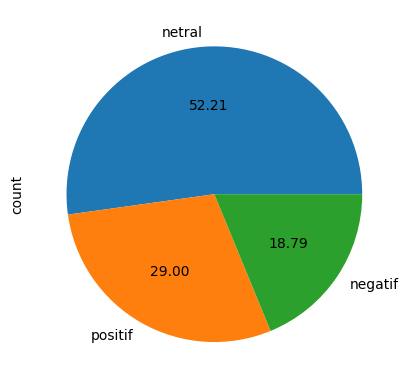

In [ ]:
data['label'].value_counts().plot.pie(autopct='%.2f')

### 8. Melabeli nilai sentimen
- Negatif = 0
- Positif = 1
- Netral = 2

In [ ]:
data.replace(to_replace='negatif', value=0, inplace=True)
data.replace(to_replace='positif', value=1, inplace=True)
data.replace(to_replace='netral', value=2, inplace=True)
data.head()

<ipython-input-17-cb1092666f5f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.replace(to_replace='negatif', value=0, inplace=True)
<ipython-input-17-cb1092666f5f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.replace(to_replace='positif', value=1, inplace=True)
<ipython-input-17-cb1092666f5f>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace(to_replace='netral', v

,stemming_postingan,label
0,cek langsung pj bupati bogor kpu bawaslu pasti...,1
1,untung kpu bawaslu,1
2,tester id ri anak prof lingkar kuasa,2
3,id ri siaga saudara lakilaki dukung pramono ra...,0
4,curang pilih kepala daerah lapor mk lapor mk d...,0


### 9. Membuat data training
Split data untuk training

In [ ]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(data, test_size=0.3)
df_val, df_test = train_test_split(df_test, test_size=0.7)
df_train.shape, df_test.shape, df_val.shape
print('Training data shape:', df_train.shape)
print('Validation data shape:', df_val.shape)
print('Test data shape:', df_test.shape)

Training data shape: (1918, 2)
Validation data shape: (246, 2)
Test data shape: (577, 2)


### 10. Membuat perbandingan label sentimen

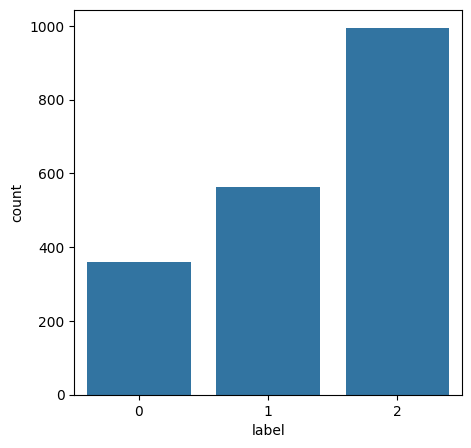

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 5))
sns.countplot(x=df_train['label'])
plt.show()

### 11. Membuat data training csv
Data training adalah kumpulan data yang digunakan untuk melatih model. Fungsinya adalah:

- Mengajarkan pola: Model mempelajari hubungan antara input (fitur) dan output (label) dari data.
- Mengoptimalkan parameter: Parameter model seperti bobot dalam neural network dioptimalkan untuk meminimalkan kesalahan pada data training.
- Dasar pembelajaran model: Model membangun kemampuan prediksi berdasarkan pola-pola yang ditemukan di data training.

In [ ]:
df_train.to_csv('data_training.csv', index = False)

In [ ]:
# Menampilkan 5 data training
data = pd.read_csv('data_training.csv')
data.head()

,stemming_postingan,label
0,id ri ri pkb benar temu jalan gerus bohong tutup,1
1,kisah lari koruptor harun masikhu by duga liba...,1
2,antusiasme masyarakat laksana pilih kepala dae...,1
3,kpu bawaslu dukung mulyono ngakalin atiran id ri,2
4,id ri real count pilih kepala daerah dki jakar...,1


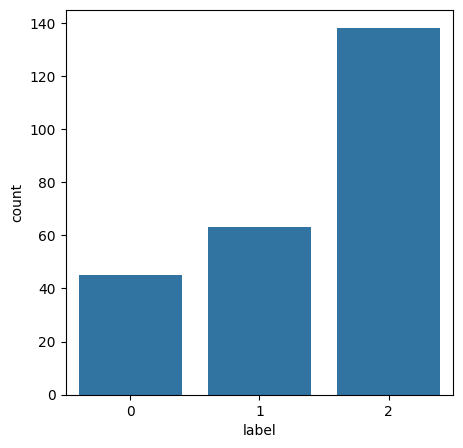

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 5))
sns.countplot(x=df_val['label'])
plt.show()

### 12. Membuat data validasi csv
Data validasi adalah subset dari data yang digunakan untuk mengevaluasi performa model selama pelatihan. Fungsinya adalah:

- Menghindari overfitting: Dengan mengevaluasi model pada data yang belum pernah dilihat (data validasi), kita dapat memastikan bahwa model tidak hanya menghafal data training.
- Menguji generalisasi: Data validasi membantu menentukan seberapa baik model bekerja pada data baru yang serupa dengan data training.
- Hyperparameter tuning: Data validasi digunakan untuk memilih hyperparameter terbaik (misalnya, jumlah lapisan, ukuran batch, atau nilai regulasi).

In [ ]:
df_val.to_csv('data_validasi.csv', index = False)

In [ ]:
# menampilkan data training
data = pd.read_csv('data_validasi.csv')
data.head()

,stemming_postingan,label
0,pilih kepala daerah aman damai ajang partisipa...,1
1,oknum pesan grup whatsapp internal sepi saiful...,0
2,didu percaya lembaga survey sulit menang kpu b...,0
3,antusiasme masyarakat pilih kepala daerah cerm...,1
4,kpu bawaslu polisi pegang kendali gaji uang ra...,2


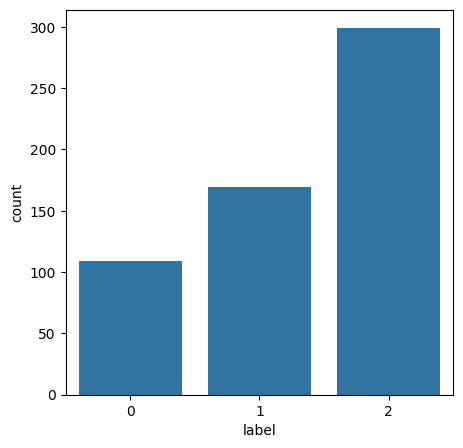

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 5))
sns.countplot(x=df_test['label'])
plt.show()

In [ ]:
df_test.to_csv('data_testing.csv', index = False)

In [ ]:
data = pd.read_csv('data_testing.csv')
data.head()

,stemming_postingan,label
0,tertib satpol pulang pergi surabaya kpu bawasl...,1
1,w jatim id ri menang main kotor malu usut tunt...,0
2,kpu bawaslu jamin angka original rekap,2
3,cilakanya id ri amp pilih buta mata praktik kotor,0
4,bawaslu kabupaten malang awas kirim rekapitula...,0


### 13. BERT Token

In [ ]:
from transformers import BertTokenizer

# Load tokenizer dari pre-trained model
bert_tokenizer = BertTokenizer.from_pretrained('indobenchmark/indobert-base-p2')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/229k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.53k [00:00<?, ?B/s]

In [ ]:
# Melihat perbendaharaan kata yang akan di trainign
vocabulary = bert_tokenizer.get_vocab()
print('Kumpulan Kata Untuk pre-train :', len(vocabulary))

Kumpulan Kata Untuk pre-train : 30521


In [ ]:
print(vocabulary)

{'[PAD]': 0, '[UNK]': 1, '[CLS]': 2, '[SEP]': 3, '[MASK]': 4, '##an': 5, 'd': 6, '##er': 7, 'm': 8, '##en': 9, 's': 10, 'p': 11, '##ar': 12, 'b': 13, 'k': 14, '##at': 15, '##ang': 16, '##in': 17, 't': 18, '##ak': 19, '##al': 20, '##ah': 21, '##as': 22, '##un': 23, '##am': 24, '##em': 25, 'di': 26, '##ya': 27, '##el': 28, '##ad': 29, '##eng': 30, 'y': 31, '##kan': 32, '##tu': 33, 'yang': 34, 'se': 35, '##ap': 36, '##is': 37, 'l': 38, '##ik': 39, 'h': 40, 'dan': 41, 'j': 42, 'ke': 43, '##il': 44, 'men': 45, '##on': 46, '##it': 47, 'in': 48, 'ber': 49, '##us': 50, '##ga': 51, '##or': 52, '##es': 53, 'ter': 54, '##ing': 55, 'r': 56, '##nya': 57, '##ur': 58, '##akan': 59, 'mem': 60, 'c': 61, 'per': 62, '##ut': 63, '##id': 64, '##ari': 65, '##ul': 66, '##um': 67, 'n': 68, '##ada': 69, '##uk': 70, '##ek': 71, '##ir': 72, '##ol': 73, '##ih': 74, '##engan': 75, '##ung': 76, '##eb': 77, 'un': 78, 'dengan': 79, 'meng': 80, '##tuk': 81, '##ag': 82, 'g': 83, '##et': 84, '##ara': 85, '##and': 86, '#

In [ ]:
# Contoh Tokenisasi
# dari indeks pertama
print('Kalimat:', tweet['stemming_postingan'][0])
print('BERT Tokenizer:', bert_tokenizer.tokenize(tweet['stemming_postingan'][0]))

Kalimat: cek langsung pj bupati bogor kpu bawaslu pasti sarana prasarana tps kondisi
BERT Tokenizer: ['cek', 'langsung', 'pj', 'bupati', 'bogor', 'kpu', 'bawaslu', 'pasti', 'sarana', 'prasarana', 'tps', 'kondisi']


In [ ]:
# Example of input formatting for BERT.
# Input formatting can use 'encode_plus' function
bert_input = bert_tokenizer.encode_plus(
    # Sample sentences
    tweet['stemming_postingan'][0],
    # Add [CLS] token at the beginning of the sentence & [SEP] token at the end of the sentence
    add_special_tokens = True,
    # Add padding to max_length using [PAD] token
    # jika kalimat kurang dari max_length
    padding = 'max_length',
    # Truncate if sentence is more than max_length
    truncation = 'longest_first',
    # Determine the max_length of the entire sentence
    max_length = 50,
    # Returns the attention mask value
    return_attention_mask = True,
    # Returns the value of token type id (segment embedding)
    return_token_type_ids =True)
# The function 'encode_plus' returns 3 values:
# input_ids, token_type_ids, attention_mask
bert_input.keys()

dict_keys(['input_ids', 'token_type_ids', 'attention_mask'])

In [ ]:
# Original data
print('Kalimat\t\t:', tweet['stemming_postingan'][0]) #1 denotes first order data or first tweet data
                                                   # so for example I change it to 1000 still 1 data appears but the order is 1000th
# Input formatting + tokenizer return
print('Tokenizer\t:', bert_tokenizer.convert_ids_to_tokens(bert_input['input_ids']))
# Input IDs: token indexes in the tokenizer vocabulary
print('Input IDs\t:', bert_input['input_ids'])
# Token type IDs: shows the sequence of sentences in the sequence (segment embedding)
print('Token Type IDs\t:', bert_input['token_type_ids'])
# Attention mask : returns value [0,1].
#1 means masked token, 0 tokens are not masked (ignored)
print('Attention Mask\t:', bert_input['attention_mask'])

Kalimat		: cek langsung pj bupati bogor kpu bawaslu pasti sarana prasarana tps kondisi
Tokenizer	: ['[CLS]', 'cek', 'langsung', 'pj', 'bupati', 'bogor', 'kpu', 'bawaslu', 'pasti', 'sarana', 'prasarana', 'tps', 'kondisi', '[SEP]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]']
Input IDs	: [2, 3158, 728, 16962, 3313, 3286, 5750, 18823, 1195, 3269, 8271, 14902, 1186, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Token Type IDs	: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Attention Mask	: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,

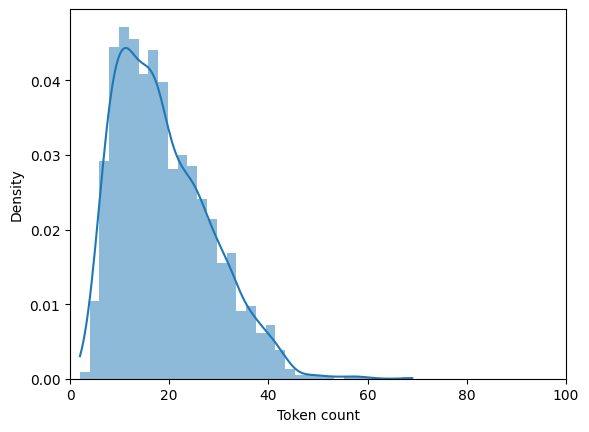

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

token_lens = []
for txt in tweet['stemming_postingan']:
  tokens = bert_tokenizer.encode(txt) # tokenizer BERT untuk memecah teks menjadi token
  token_lens.append(len(tokens)) # Menghitung jumlah token yang dihasilkan
sns.histplot(token_lens, kde=True, stat='density', linewidth=0)
plt.xlim([0, 100]);
plt.xlabel('Token count');

In [ ]:
# Create a function to combine tokenization steps
# Added special tokens for all data as input formatting to the BERT model
def convert_example_to_feature(sentence):
  return bert_tokenizer.encode_plus(
      sentence,
      add_special_tokens=True,
      padding='max_length',
      truncation='longest_first',
      max_length=42,
      return_attention_mask=True,
      return_token_type_ids=True)

In [ ]:
# Create a function to map input formatting results to match the BERT model
def map_example_to_dict(input_ids, attention_masks, token_type_ids, label):
  return {
      "input_ids": input_ids,               # Sebagai token embedding
      "token_type_ids": token_type_ids,     # Sebagai segment embedding
      "attention_mask": attention_masks,    # Sebagai filter informasi mana yang kalkulasi oleh model
  }, label

In [ ]:
import tensorflow as tf
# Create a function to iterate or encode each sentence in the entire data
def encode(data):
  input_ids_list = []
  token_type_ids_list = []
  attention_mask_list = []
  label_list = []

  for sentence, label in data.to_numpy():
    bert_input = convert_example_to_feature(sentence)
    input_ids_list.append(bert_input['input_ids'])
    token_type_ids_list.append(bert_input['token_type_ids'])
    attention_mask_list.append(bert_input['attention_mask'])
    label_list.append([label])
  return tf.data.Dataset.from_tensor_slices((input_ids_list, attention_mask_list, token_type_ids_list, label_list)).map(map_example_to_dict)

In [ ]:
# Perform input formatting using the previous function on the data as a whole
train_encoded = encode(df_train).batch(32)
test_encoded = encode(df_test).batch(32)
val_encoded = encode(df_val).batch(32)

In [ ]:
from transformers import TFBertForSequenceClassification

# Load model
bert_model = TFBertForSequenceClassification.from_pretrained(
    'indobenchmark/indobert-base-p2', num_labels=3)

tf_model.h5:   0%|          | 0.00/656M [00:00<?, ?B/s]

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p2 and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# Compile model
bert_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.00003),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=tf.keras.metrics.SparseCategoricalAccuracy('accuracy'))

In [ ]:
%%time
bert_history = bert_model.fit(train_encoded, epochs=5,
                              batch_size=20, validation_data=val_encoded)

Epoch 1/5
60/60 [==============================] - 999s 16s/step - loss: 0.7742 - accuracy: 0.6408 - val_loss: 0.4403 - val_accuracy: 0.8374
Epoch 2/5
60/60 [==============================] - 966s 16s/step - loss: 0.3656 - accuracy: 0.8686 - val_loss: 0.2973 - val_accuracy: 0.8943
Epoch 3/5
60/60 [==============================] - 958s 16s/step - loss: 0.1688 - accuracy: 0.9473 - val_loss: 0.3078 - val_accuracy: 0.9146
Epoch 4/5
60/60 [==============================] - 954s 16s/step - loss: 0.1131 - accuracy: 0.9656 - val_loss: 0.3659 - val_accuracy: 0.8984
Epoch 5/5
60/60 [==============================] - 956s 16s/step - loss: 0.0807 - accuracy: 0.9729 - val_loss: 0.3820 - val_accuracy: 0.8943
CPU times: user 2h 4min 44s, sys: 5min 8s, total: 2h 9min 52s
Wall time: 1h 22min 4s


In [ ]:
# Create a function for plotting training results
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel('Epochs')
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

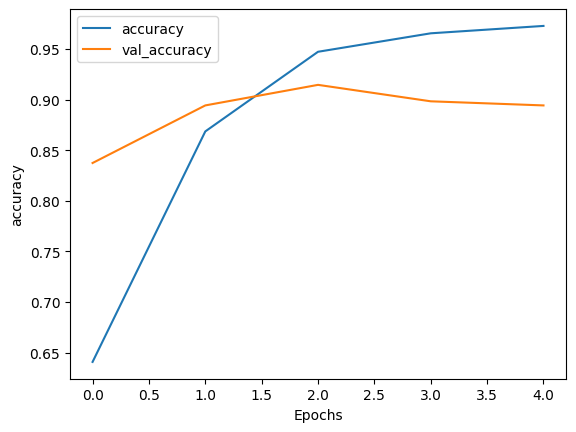

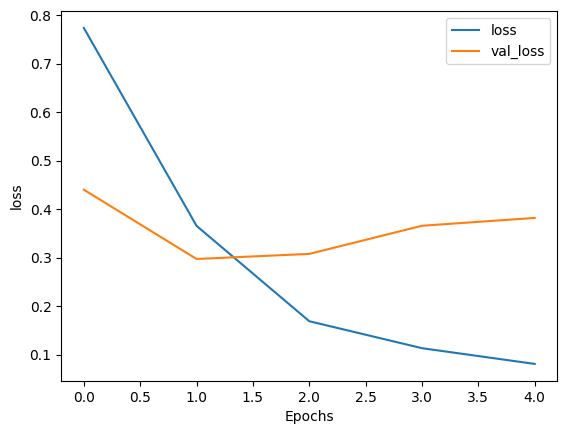

In [ ]:
plot_graphs(bert_history, 'accuracy')
plot_graphs(bert_history, 'loss')

In [ ]:
print('\nEpoch No.  Train Accuracy  Train Loss      Val Accuracy    Val Loss')
num_epochs = len(bert_history.history['accuracy'])  # Get the actual number of epochs
for i in range(num_epochs):  # Iterate through the available epochs
  print('{:8d} {:10f} \t {:10f} \t {:10f} \t {:10f}'.format(i + 1, bert_history.history['accuracy'][i],
                                                            bert_history.history['loss'][i],
                                                            bert_history.history['val_accuracy'][i],
                                                            bert_history.history['val_loss'][i]))


Epoch No.  Train Accuracy  Train Loss      Val Accuracy    Val Loss
       1   0.640772 	   0.774201 	   0.837398 	   0.440262
       2   0.868613 	   0.365615 	   0.894309 	   0.297267
       3   0.947341 	   0.168766 	   0.914634 	   0.307752
       4   0.965589 	   0.113129 	   0.898374 	   0.365857
       5   0.972888 	   0.080650 	   0.894309 	   0.382007


In [ ]:
bert_model.save_weights('bert-model.h5')

In [ ]:
%%time
score = bert_model.evaluate(test_encoded)
print("Test Accuracy:", score[1])

19/19 [==============================] - 80s 4s/step - loss: 0.5499 - accuracy: 0.8527
Test Accuracy: 0.8526862859725952
CPU times: user 2min 7s, sys: 568 ms, total: 2min 8s
Wall time: 1min 21s


In [ ]:
predicted_raw = bert_model.predict(test_encoded)

19/19 [==============================] - 89s 4s/step


In [ ]:
import numpy as np # Importing numpy library and assigning the alias 'np'

y_pred = np.argmax(predicted_raw['logits'], axis=1) # Now np.argmax is recognized
y_true = np.array(df_test['label']) # Now np.array is recognized

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

accuracy_score(y_true, y_pred)

0.8526863084922011

In [ ]:
confusion_matrix(y_true, y_pred)

array([[ 82,   7,  20],
       [  3, 154,  12],
       [ 19,  24, 256]])

In [ ]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.75      0.77       109
           1       0.83      0.91      0.87       169
           2       0.89      0.86      0.87       299

    accuracy                           0.85       577
   macro avg       0.84      0.84      0.84       577
weighted avg       0.85      0.85      0.85       577



In [ ]:
# Load fine-tuning results
bert_load_model = TFBertForSequenceClassification.from_pretrained(
    'indobenchmark/indobert-base-p2', num_labels=3)
bert_load_model.load_weights('bert-model.h5')

In [ ]:
# Sample text
input_text = 'bawaslu seharusnya lebih giat lagi dalam menegakkan pelanggaran pemilu, mengecewakan jika harus ada keberpihakan dalam pelaksanaan yang seharusnya jujur dan adil'

# Encode input text
input_text_tokenized = bert_tokenizer.encode(input_text,
                                             truncation=True,
                                             padding='max_length',
                                             return_tensors='tf')

Asking to pad to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no padding.
Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


In [ ]:
# Make predictions
bert_predict = bert_load_model(input_text_tokenized)
# Softmax function to get classification results
bert_output = tf.nn.softmax(bert_predict[0], axis=-1)

In [ ]:
sentiment_labels = ['netral','negatif', 'positif']
label = tf.argmax(bert_output, axis=1)
label = label.numpy()

In [ ]:
print(input_text, ':', sentiment_labels[label[0]])

In [ ]:
import seaborn as sn
from pandas import DataFrame
confm = confusion_matrix(y_true, y_pred)
columns = ['negatif','positif','netral']
df_cm = DataFrame(confm, index=columns, columns=columns)
ax = sn.heatmap(df_cm, cmap='Blues', annot=True)
ax.set_title('Confusion matrix')
ax.set_xlabel('Label prediksi')
ax.set_ylabel('Label sebenarnya')

In [ ]:
import seaborn as sn
from pandas import DataFrame
from sklearn.metrics import confusion_matrix

# ... (Your existing code) ...

# Get unique labels from both y_true and y_pred
labels = sorted(list(set(y_true) | set(y_pred)))
# Calculate confusion matrix with labels parameter
confm = confusion_matrix(y_true, y_pred, labels=labels)

# Update columns to match the unique labels if needed
columns = labels if len(labels) != len(columns) else columns

# Create DataFrame
df_cm = DataFrame(confm, index=columns, columns=columns)
ax = sn.heatmap(df_cm, cmap='Blues', annot=True)
ax.set_title('Confusion matrix')
ax.set_xlabel('Label prediksi')
ax.set_ylabel('Label sebenarnya')

## WordCloud

In [ ]:
df_GROUPBY_label = data_inset.groupby("label", sort=False)
df_GROUPBY_label.get_group('positif')
datagroup = df_GROUPBY_label[['preprocessing','label']].get_group('positif')
datagroup.to_csv('positif.csv')

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Membaca data
positif = pd.read_csv('positif.csv')

# Menggabungkan teks dari kolom 'preprocessing'
allWords = ' '.join([twts for twts in positif['preprocessing']])

# Menghapus tanda petik dari teks
allWords = allWords.replace("'", "").replace('"', "")

# Membuat wordcloud
wordCloud = WordCloud(colormap="viridis", background_color='white',
                       width=800, height=800, random_state=10,
                       max_font_size=200, min_font_size=20).generate(allWords)

# Menampilkan wordcloud
plt.figure(figsize=(10, 5), facecolor='k', frameon=False)
plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
df_GROUPBY_label = data_inset.groupby("label", sort=False)
df_GROUPBY_label.get_group('negatif')
datagroup = df_GROUPBY_label[['preprocessing','label']].get_group('negatif')
datagroup.to_csv('negatif.csv')

In [ ]:
negatif = pd.read_csv('negatif.csv')
%matplotlib inline

import matplotlib.pyplot as plt
from wordcloud import WordCloud, ImageColorGenerator
allWords = ' '.join([twts for twts in  negatif['preprocessing']])

allWords = allWords.replace("'", "").replace('"', "")

wordCloud = WordCloud(colormap="viridis", background_color='white',
                       width=800, height=800, random_state=10, max_font_size=200, min_font_size=20).generate(allWords)

plt.figure( figsize=(10,5), facecolor='k', frameon=False)
plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
df_GROUPBY_label = data_inset.groupby("label", sort=False)
df_GROUPBY_label.get_group('netral')
datagroup = df_GROUPBY_label[['preprocessing','label']].get_group('netral')
datagroup.to_csv('netral.csv')

In [ ]:
netral = pd.read_csv('netral.csv')
%matplotlib inline

import matplotlib.pyplot as plt
from wordcloud import WordCloud, ImageColorGenerator
allWords = ' '.join([twts for twts in  netral['preprocessing']])

allWords = allWords.replace("'", "").replace('"', "")

wordCloud = WordCloud(colormap="viridis", background_color='white',
                       width=800, height=800, random_state=200, max_font_size=200, min_font_size=20).generate(allWords)

plt.figure( figsize=(10,5), facecolor='k', frameon=False)
plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()